In [ ]:
import numpy as np
import cv2
import copy
from matplotlib import pyplot as plt
b=0
img = cv2.imread("/content/drive/MyDrive/DIP/fruit.tif",0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
for u in range(0,600):
  for v in range(0,300):
      if(275.8<magnitude_spectrum[u,v]<308):
        b=b+1
        print(u,v)
print(b)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.savefig('/content/drive/MyDrive/DIPproject2/fruit-proj2b.png',dpi =150)

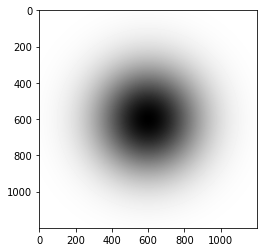

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
M=1200
N=1200
H=np.zeros((M,N),dtype=np.float32)
D0=200
for u in range(1,1200):
  for v in range(1,1200):
      D=np.sqrt((u-M/2)**2+(v-N/2)**2)
      H[u,v]=np.exp(-D**2/(2*D0*D0))
plt.imshow(1-H,cmap='gray')
plt.savefig('/content/drive/MyDrive/DIPproject2/GHPF-proj2c.png',dpi =150)

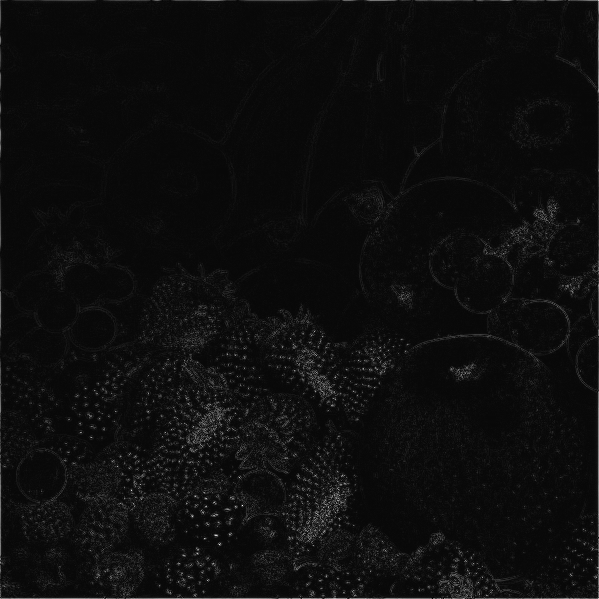

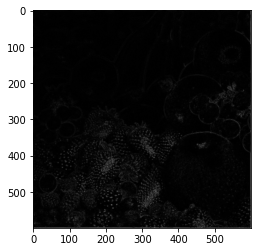

In [4]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
M=1200
N=1200
H=np.zeros((M,N),dtype=np.float32)
D0=500
for u in range(1,M): 
  for v in range(1,N):
    D=np.sqrt((u-M/2)**2+(v-N/2)**2)
    H[u,v]=np.exp(-D**2/(2*D0*D0))
HPF=1-H
img = cv2.imread('/content/drive/MyDrive/DIP/fruit.tif',0)
img_min=np.amin(img) 
img_max=np.amax(img)
bottom=600
right=600
constant=cv2.copyMakeBorder(img,0,bottom,0,right,cv2.BORDER_CONSTANT,value=[0,0,0])
for u in range(1,1200):
  for v in range(1,1200):
      constant[u,v]=(constant[u,v])*(-1**(u+v))
F=cv2.dft(np.float32(constant),flags = cv2.DFT_COMPLEX_OUTPUT)
Fshift = np.fft.fftshift(F)
mag,phase= cv2.cartToPolar(Fshift[:,:,0],Fshift[:,:,1])
mag=mag*(HPF)
mag,phase = cv2.polarToCart(mag, phase)
back=cv2.merge([mag,phase])
G=np.fft.ifftshift(back)
g=cv2.idft(G)
g=cv2.magnitude(g[:,:,0],g[:,:,1])
notched = cv2.normalize(g, None, alpha=img_min, beta=img_max, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
"""
for u in range(1,1200):
  for v in range(1,1200):
      notched[u,v]=(notched[u,v])*(-1**(u+v))
"""
notched=notched[1:600,1:600]
cv2_imshow(notched)     
plt.imshow(notched,cmap='gray')
#plt.savefig('/content/drive/MyDrive/DIPproject2/fruit-proj2d-LPF.png',dpi =150)